In [2]:
#importing some necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
#create dataframe and read csv data from github

WHRP = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
WHRP

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
# first 5 rows from Dataset or write the any number in breacket if you want

WHRP.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
# Last 5 rows from Dataset or write the any number in breacket if you want

WHRP.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
#Checking the number of rows and columns in the dataset

WHRP.shape

(158, 12)

158 = Rows,
12 = Columns

In [7]:
#Checking the columns of the dataset

WHRP.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
#Getting the information of dataset ( All information about the columns/about your data )

WHRP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
#Checking the null values

WHRP.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
#Statistical summary of the dataset

WHRP.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Here we see the 10 column summary. because those are numerical columns.

Country and Region these are only 2 categorical columns.

## Plotting heatmap from null values

<AxesSubplot:>

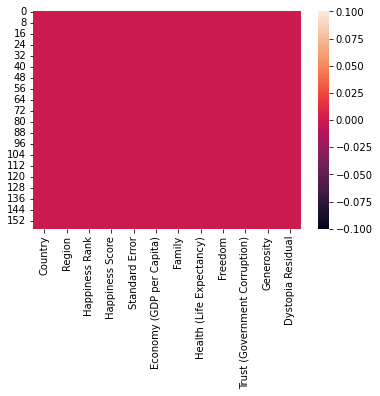

In [11]:
#Lets visualize it using heatmap

sns.heatmap(WHRP.isnull())

As we can see from heatmap, there is no missing values in dataset.

### We can see in WHRP.describe(), some countries min values are 0, so let try to find thats country.

    Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom Trust (Government Corruption), Generosity's min value is 0, so find the country name using loc method.

In [12]:
#Lets find the countries from Economy (GDP per Capita)

WHRP.loc[WHRP['Economy (GDP per Capita)'] == 0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.0368,0.0,1.0012,0.09806,0.22605,0.07625,0.24834,2.86712


Here we can see the only one country of Economy (GDP per Capita) value is 0 and that country is Congo(Kinshasa).

In [13]:
#Lets find the countries from Family

WHRP.loc[WHRP['Family'] == 0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.0785,0.0,0.06699,0.48879,0.08289,0.23835,2.7223


Here we can see the only one country of Family value is 0 and that country is Central African Republic.

In [14]:
#Lets find the countries from Health (Life Expentancy)

WHRP.loc[WHRP['Health (Life Expectancy)'] == 0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.0,0.4084,0.08786,0.21488,2.51009


Here we can see the only one country of Economy (GDP per Capita) value is 0 and that country is Sierra Leone.

In [15]:
#Lets find the countries from Freedom

WHRP.loc[WHRP['Freedom'] == 0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


Here we can see the only one country of Economy (GDP per Capita) value is 0 and that country is Iraq.

In [16]:
#Lets find the countries from Trust (Government Corruption)

WHRP.loc[WHRP['Trust (Government Corruption)'] == 0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.0,0.51535,1.86399


Here we can see the only one country of Economy (GDP per Capita) value is 0 and that country is Indonesia.

In [17]:
#Lets find the countries from Generosity

WHRP.loc[WHRP['Generosity'] == 0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.0,1.80101


Here we can see the only one country of Economy (GDP per Capita) value is 0 and that country is Greece.

### Minimum value column wise ( Coumn name = Country name )

1. Economy (GDP per Capita) = Congo (Kinshasa)
2. Family = Central African Republic
3. Health (Life Expectancy) -Sierra Leone
4. Freedom = Iraq
5. Trust (Government Corruption) - Indonesia
6. Generosity = Greece

## Create a new dataframe from numerical columns

In [18]:
#Create a new DataFrame

New_Happy = WHRP[WHRP.columns[3:]]

In [19]:
#Get output the New_Happy datafame

New_Happy

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [20]:
#Print the number of rows and columns from dataset using shape method

New_Happy.shape

(158, 9)

In [21]:
#This way also we can find the numbe of rows and column in the dataset
print("Number of rows:- ",New_Happy.shape[0])
print("Number of columns:- ",New_Happy.shape[1])

Number of rows:-  158
Number of columns:-  9


# Now seprating the variables into x and y

In [22]:
#Seprating the x and y variable using happyness score

x = New_Happy.drop(['Happiness Score'], axis=1)
y = New_Happy['Happiness Score']

In [23]:
#Get output from x Variable

x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [24]:
#Get outpur from y variable

y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

## Now checking the data distributed in each column

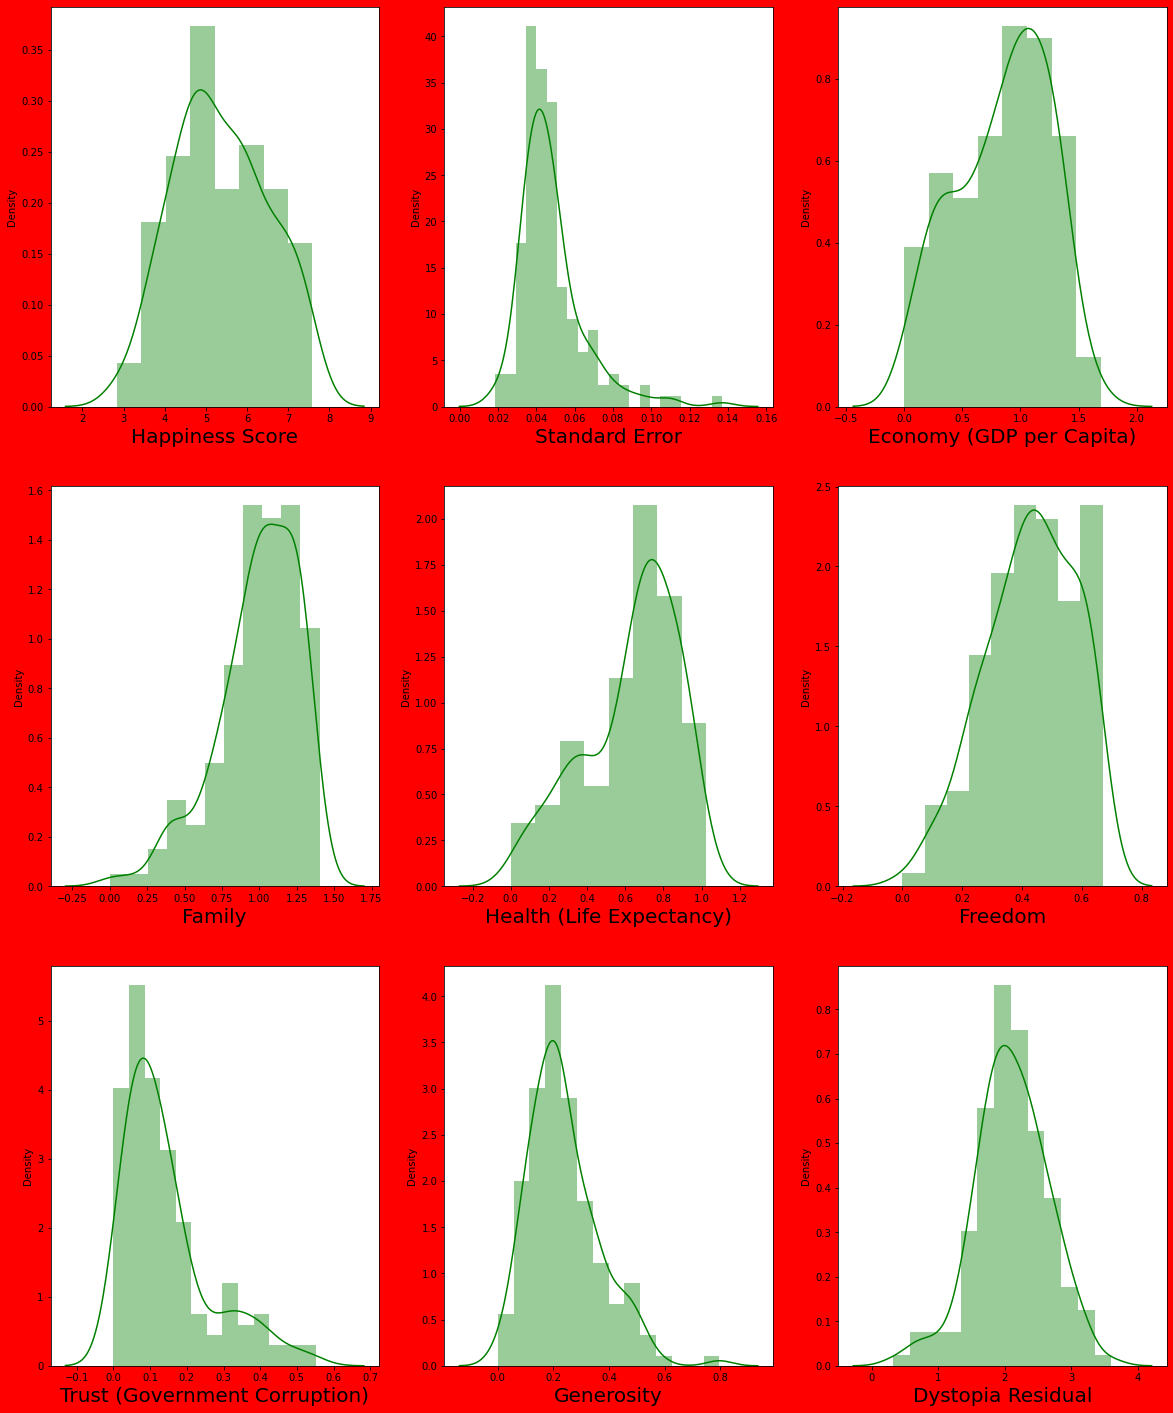

In [25]:
plt.figure(figsize=(20,25), facecolor='Red')
plotnumber =1

for column in New_Happy:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)         #in subplot method we are taking basically 3 argumrnts ( 5 is represent of number of rows, 5 is represent of number of columns and plotnumber is represent of index of the plot
        sns.distplot(New_Happy[column], color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Checking outliers

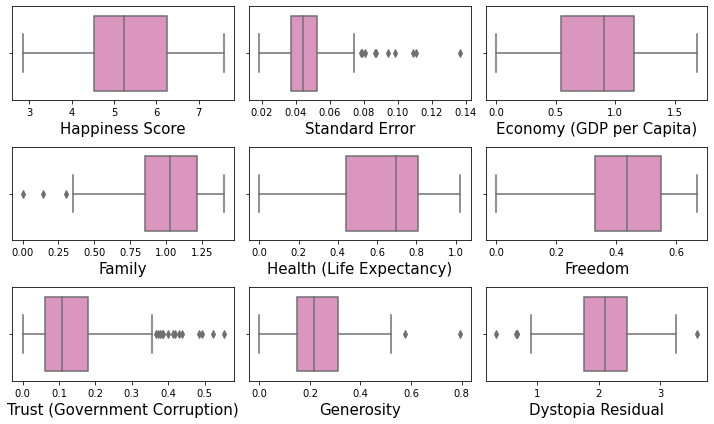

In [26]:
#lets check the outliers by plotting boxplot.

plt.figure(figsize = (10,6), facecolor = 'white')
plotnumber=1

for col in New_Happy:
    if plotnumber <=9:
        ax = plt.subplot(3, 3, plotnumber)   #in subplot method we are taking basically 3 argumrnts ( 2 is represent of number of rows, 2 is represent of number of columns and plotnumber is represent of indes of the plot
        sns.boxplot(New_Happy[col], palette='Set2_r')
        plt.xlabel(col, fontsize = 15)
        plt.yticks (rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Here we can see in the Happiness Score, Economy (GDP per Capita), Health(Life Expectancy) and Freedom has no outliers.

## Now checking the skewness from numerical columns

In [27]:
WHRP.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Now here we can see the Standard Error, Trust (Government Corruption), Generosity are right skewed distribution beacuse the long tail is on the right side of the distribution, so we can call that Right Skew Distribution.

And Family is left skew distribution beacuse the long tail is on the left side of the distribution, so we can call that Left Side Distribution.

## Let's visualize the Histplot from New_Happy dataset

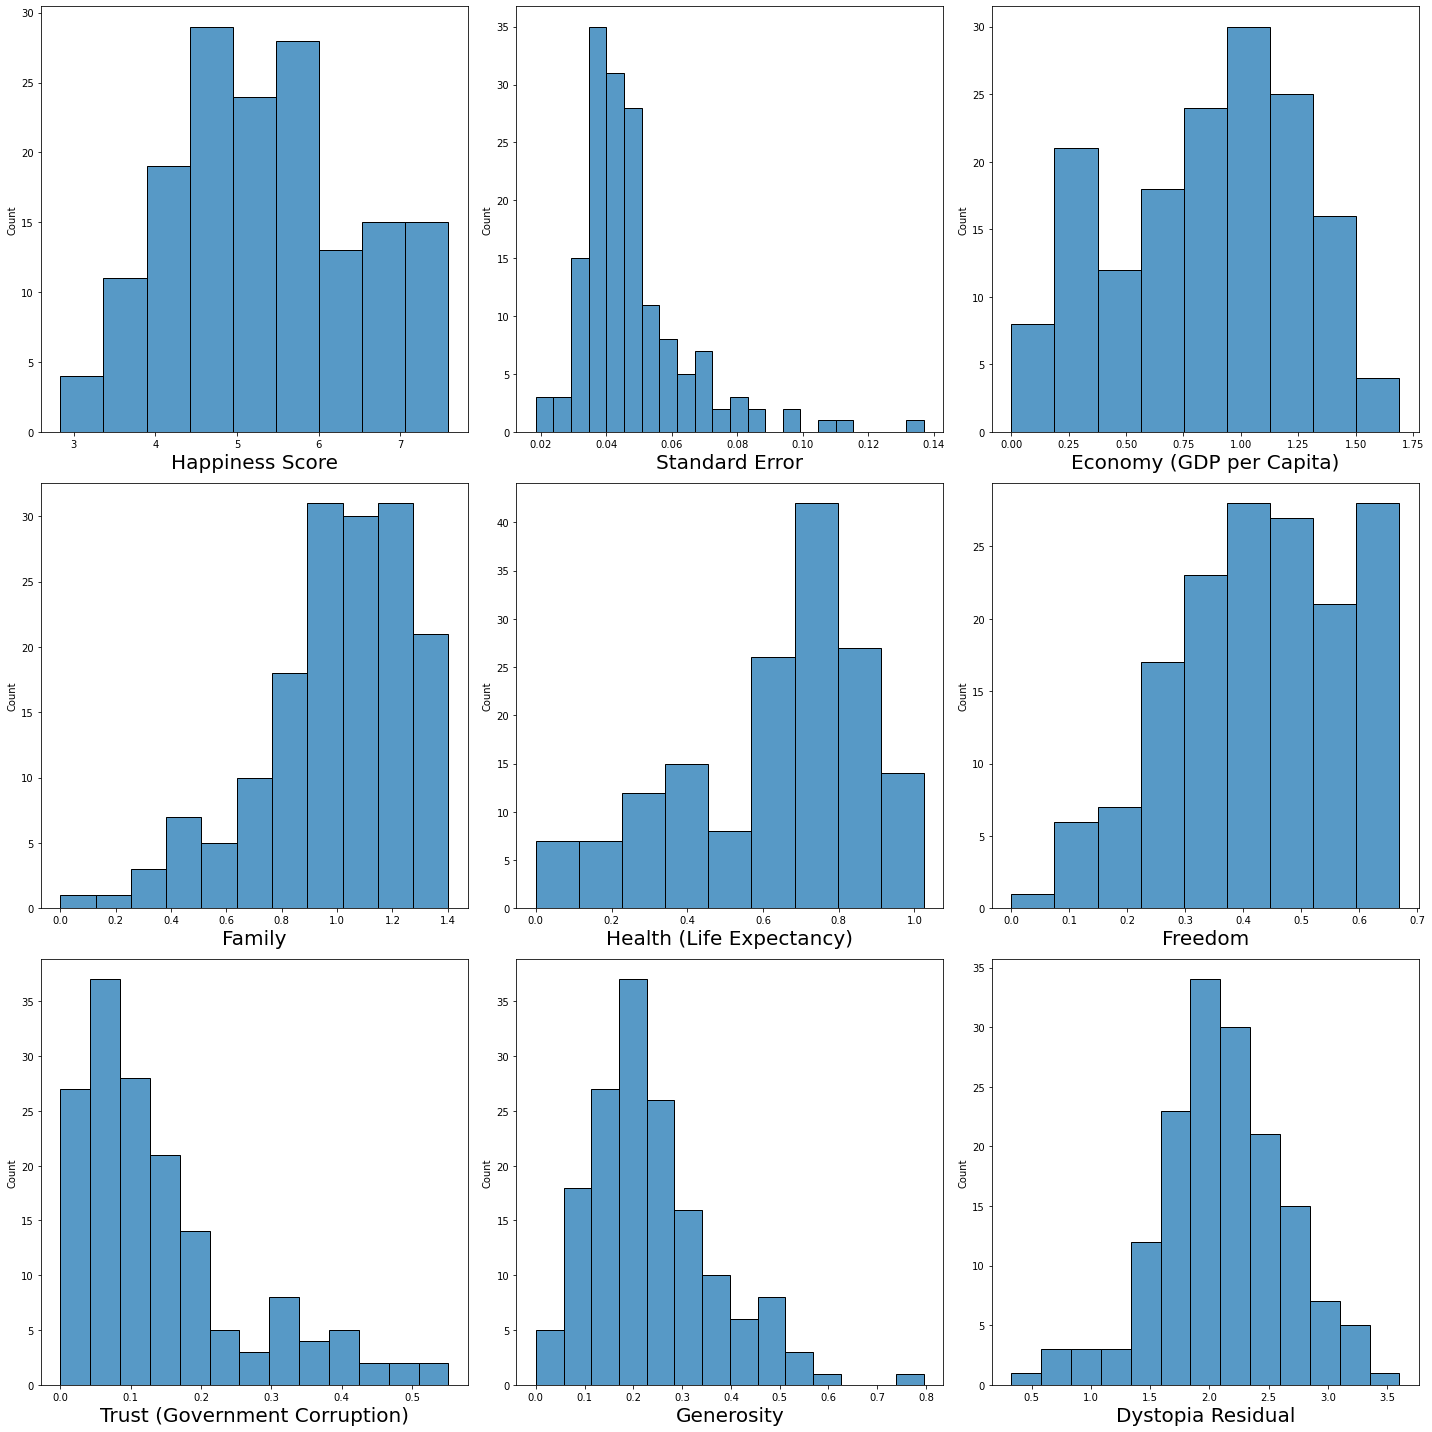

In [28]:
plt.figure(figsize=(20,20))
plotnumber = 1

for column in New_Happy:
    if plotnumber <= 9:
        ax = plt.subplot(3,3, plotnumber)
        sns.histplot(New_Happy[column], palette = 'Rainbow')
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.tight_layout()
plt.show()

We can see here the histogram represents the distribution of numeric variable for one or several group.

## Let's visualize the pairplot from New_Happy dataset

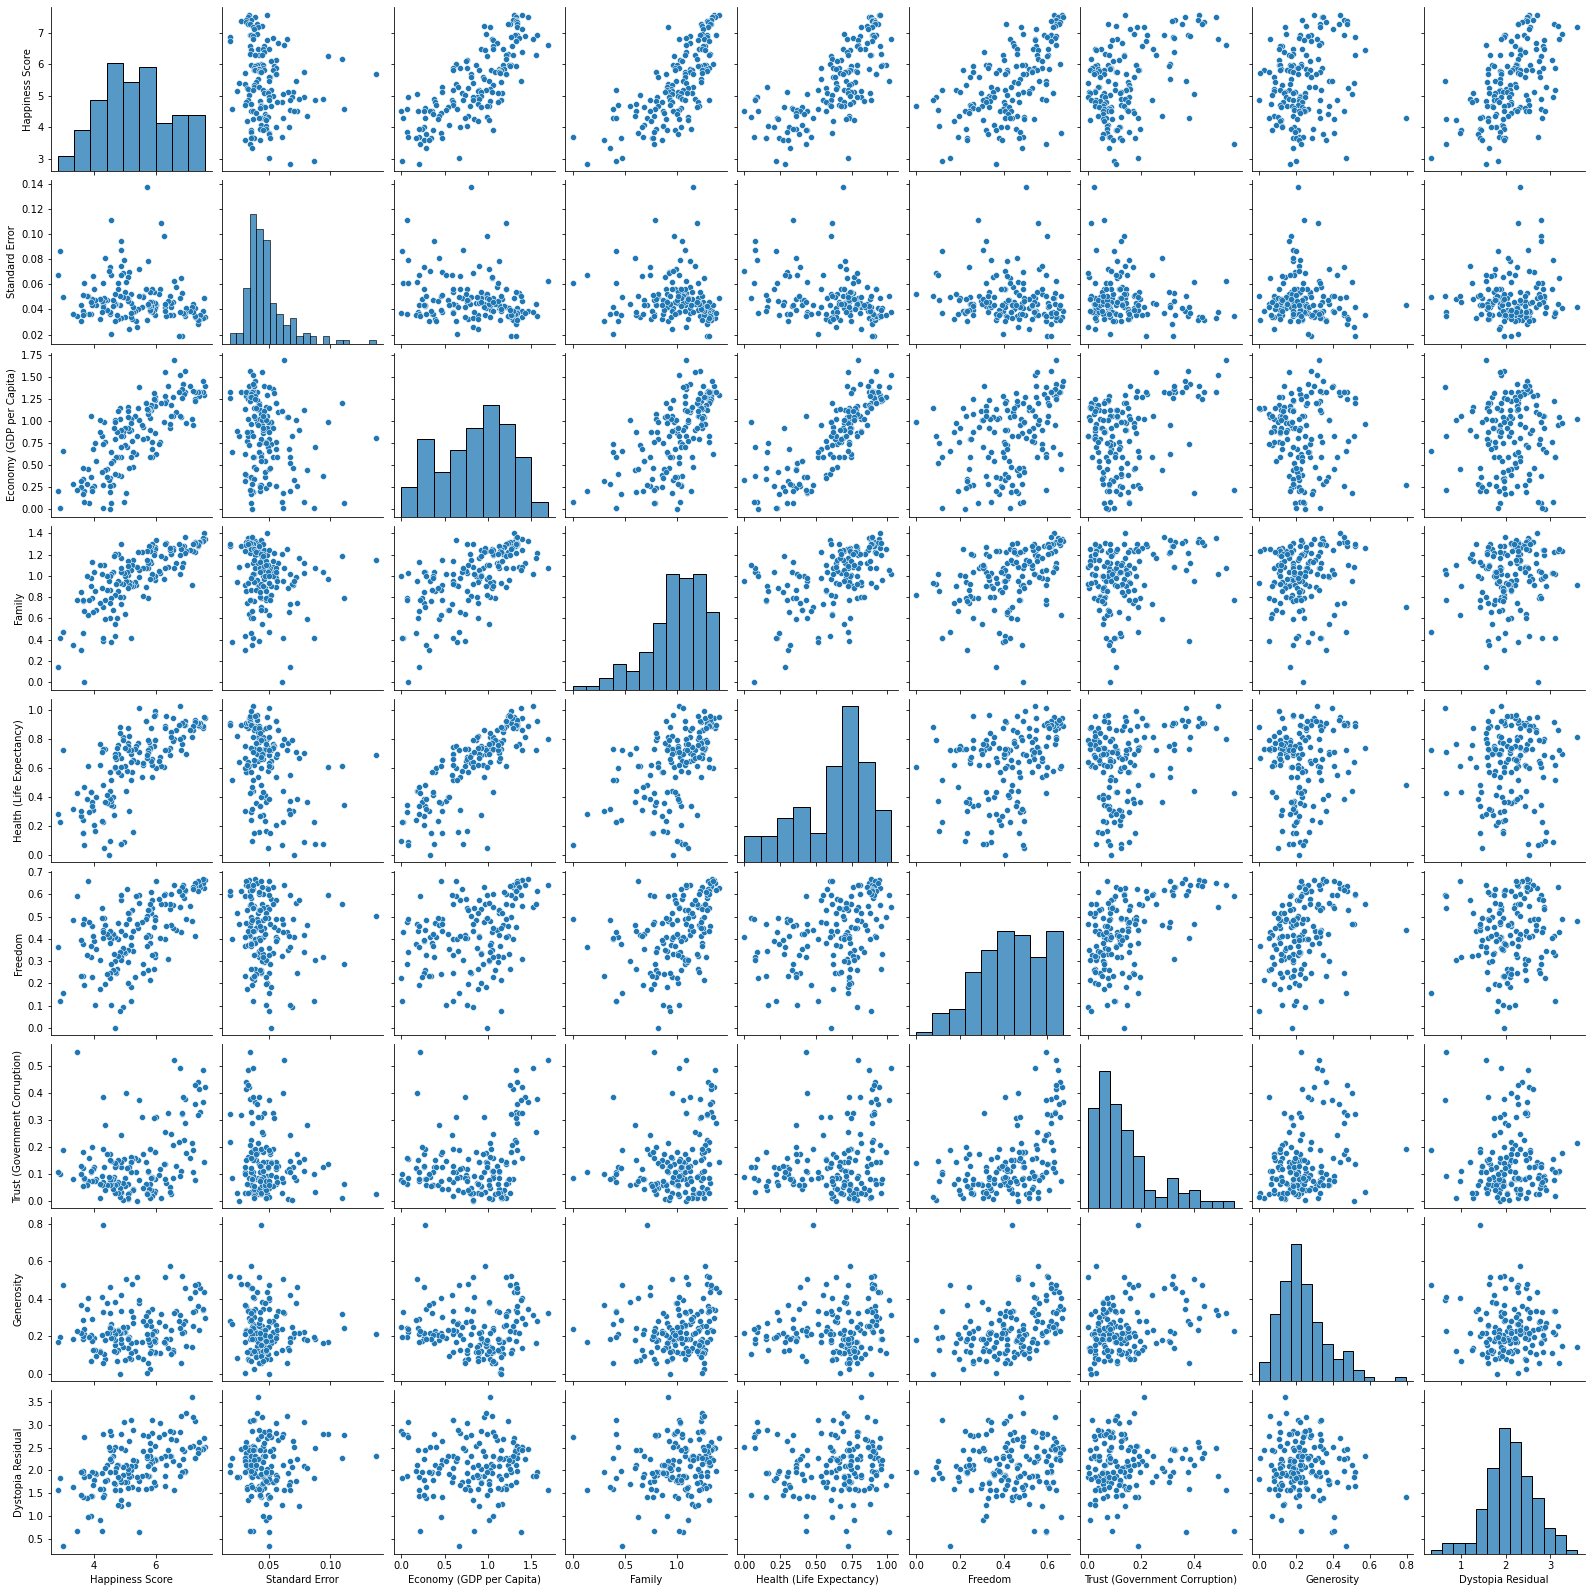

In [29]:
sns.pairplot(New_Happy, palette = 'Dark 2')

We can see here the pairwise relationships between variables within a dataset.

# Checking Variance Inflation Factor (VIF)

In [30]:
#Import Variance inflation factor (VIF) 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Faetures"] = x.columns

In [32]:
#Lets check the VIF values

vif

,VIF values,Faetures
0,7.166167,Standard Error
1,21.759914,Economy (GDP per Capita)
2,25.636995,Family
3,23.090959,Health (Life Expectancy)
4,15.880880,Freedom
5,3.497600,Trust (Government Corruption)
6,5.600094,Generosity
7,12.574726,Dystopia Residual


# Let's check the correlation between all columns with WHRP dataset

In [33]:
WHRP.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


## Visualize the correlation using WHRP Dataset by plotting heatmap

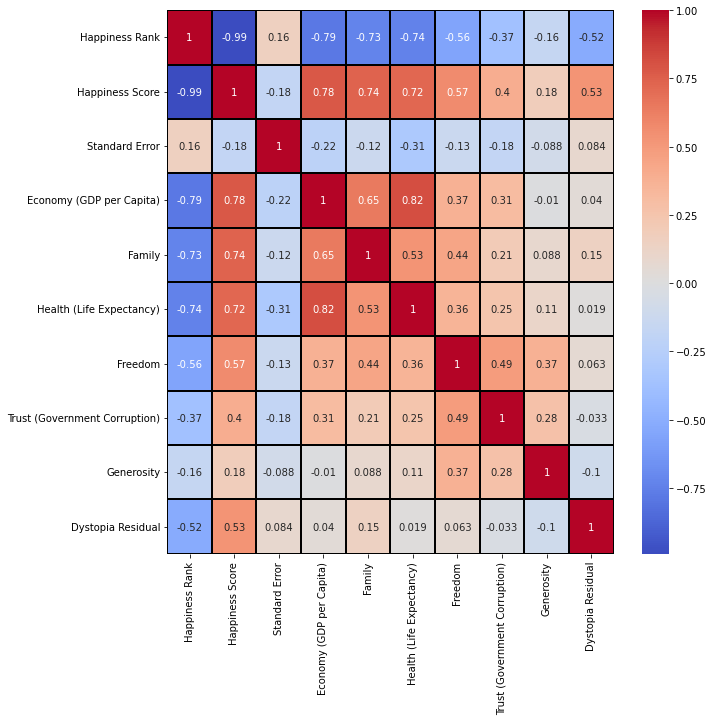

In [34]:
#Visualize correlation by plotting heatmap

plt.figure(figsize=(10,10))
sns.heatmap(WHRP.corr(), annot = True, linewidth= 0.2, linecolor = 'black', cmap = 'coolwarm')
plt.show()

# Let's check the correlation between all columns with New_Happy dataset

In [35]:
New_Happy.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


## Visualize the correlation using New_Happy Dataset by plotting heatmap

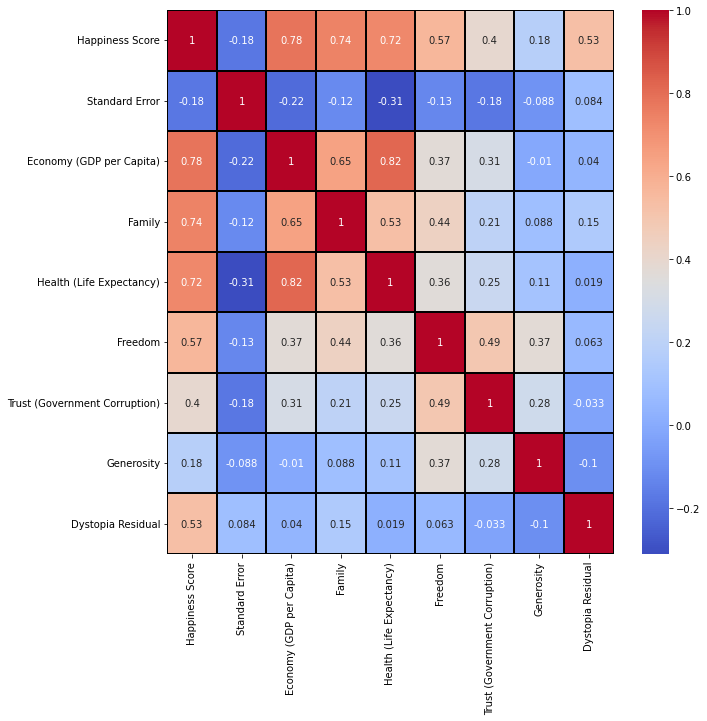

In [36]:
#Visualize correlation by plotting heatmap

plt.figure(figsize=(10,10))
sns.heatmap(New_Happy.corr(), annot = True, linewidth= 0.2, linecolor = 'black', cmap = 'coolwarm')
plt.show()

## Top 10 Happiest countries based on happiness score/rank

In [37]:
Top_10_countries = WHRP.sort_values(by = 'Happiness Score', ascending = False).head(10)

In [38]:
Top_10_countries

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


We can see top the chart Switzerland's Happiness score is 7.587.

We can see that 7 countries are from Western Europe out of 10 countries.

# Machine Learning Algorithm

## Creating train test split

In [39]:
#Import train test split

from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state=43)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", y_test.shape)

x_train shape:  (105, 8)
x_test shape:  (53, 8)
y_train shape:  (105,)
x_test shape:  (53,)


## Finding Best Random state

In [41]:
#Import libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Find accuracy score

maxR2_score=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(x_train,y_train)
    Pred=lin_reg.predict(x_test)
    R2=r2_score(y_test,Pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.999999955318454 on Random_state 148


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=maxRS)

## LinearRegression

In [65]:
# importing necessary libraries
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
pred_LR=lin_reg.predict(x_test)
y_pred=lin_reg.predict(x_test)


print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n',y_test)

Predicted result price:
 [4.19434346 4.51781684 6.81023013 5.01309407 4.50720395 4.27066363
 7.52701688 6.78620475 6.79777047 4.89756747 4.07677292 6.75012827
 3.89657483 3.66725903 7.22564804 5.83273192 5.98709822 4.85765591
 5.87828533 4.56467091 7.28598847 6.93734686 5.70879757 6.66965503
 6.29816172 2.83892886 3.68089831 5.05720615 3.34001504 3.6777401
 3.9888383  5.82824063 3.93080442 4.86720167 7.19979373 4.30690075
 7.1872786  3.00632294 7.27768044 4.87594888 6.26921281 5.47699043
 4.97111373 7.52215762 3.84498095 6.41122311 6.12272917 4.33215455]


actual price
 134    4.194
118    4.518
22     6.810
91     5.013
122    4.507
131    4.271
2      7.527
24     6.786
23     6.798
96     4.898
135    4.077
25     6.750
142    3.896
148    3.667
11     7.226
55     5.833
45     5.987
101    4.857
52     5.878
116    4.565
8      7.286
18     6.937
64     5.709
26     6.670
37     6.298
157    2.839
146    3.681
90     5.057
154    3.340
147    3.678
138    3.989
56     5.828
140    

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("R2_Score:",r2_score(y_test,pred_LR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error:-",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_Score: 0.9999999641035279
Mean Absolute Error:- 0.0002169302964084019
Mean Squared Error:- 6.470205217580306e-08
Root Mean Squared Error:- 0.0002543659807753448


## RandomForestRegressor

In [45]:
#Import necessary library
from sklearn.ensemble import RandomForestRegressor

RF_reg=RandomForestRegressor()
RF_reg.fit(x_train,y_train)
pred_RF=RF_reg.predict(x_test)
y_pred=RF_reg.predict(x_test)


print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n',y_test)

Predicted result price:
 [4.63762 4.4743  6.45256 5.38928 4.49942 4.99256 7.37306 6.23515 6.20571
 4.43131 4.35273 6.99184 4.70597 3.93777 6.56218 6.05285 6.2978  5.27219
 5.69021 5.06017 7.06284 6.85891 5.78798 6.03314 6.17559 3.61635 3.79613
 4.45384 3.75684 4.44086 4.47394 5.74458 4.09231 5.29372 7.20467 3.883
 6.07931 4.62946 6.39683 4.87501 5.96179 5.20651 4.53282 7.24687 3.60816
 6.19628 5.88764 4.75847]


actual price
 134    4.194
118    4.518
22     6.810
91     5.013
122    4.507
131    4.271
2      7.527
24     6.786
23     6.798
96     4.898
135    4.077
25     6.750
142    3.896
148    3.667
11     7.226
55     5.833
45     5.987
101    4.857
52     5.878
116    4.565
8      7.286
18     6.937
64     5.709
26     6.670
37     6.298
157    2.839
146    3.681
90     5.057
154    3.340
147    3.678
138    3.989
56     5.828
140    3.931
100    4.867
12     7.200
128    4.307
13     7.187
155    3.006
10     7.278
98     4.876
39     6.269
70     5.477
93     4.971
3      7.52

In [46]:
print("R2_Score:",r2_score(y_test,pred_RF))
print("Mean Absolute Error:-",mean_absolute_error(y_test,pred_RF))
print("Mean Squared Error:-",mean_squared_error(y_test,pred_RF))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RF)))

R2_Score: 0.8607186560433101
Mean Absolute Error:- 0.396301875
Mean Squared Error:- 0.25104942748125014
Root Mean Squared Error:- 0.5010483284886301


## DecisionTreeRegressor

In [47]:
#Import necessary library
from sklearn.tree import DecisionTreeRegressor

DT_reg=DecisionTreeRegressor()
DT_reg.fit(x_train,y_train)
pred_DT=DT_reg.predict(x_test)
y_pred=DT_reg.predict(x_test)


print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n',y_test)

Predicted result price:
 [4.739 4.61  6.983 6.13  4.61  5.102 7.587 6.485 6.575 4.61  4.715 6.94
 4.839 3.575 6.983 6.574 6.575 5.332 5.192 4.633 7.427 6.867 5.855 5.975
 6.867 3.956 3.575 4.61  3.587 4.369 5.073 5.855 3.781 5.268 7.284 3.587
 5.975 5.007 6.867 5.253 5.89  5.073 4.571 7.284 3.575 5.984 5.89  5.102]


actual price
 134    4.194
118    4.518
22     6.810
91     5.013
122    4.507
131    4.271
2      7.527
24     6.786
23     6.798
96     4.898
135    4.077
25     6.750
142    3.896
148    3.667
11     7.226
55     5.833
45     5.987
101    4.857
52     5.878
116    4.565
8      7.286
18     6.937
64     5.709
26     6.670
37     6.298
157    2.839
146    3.681
90     5.057
154    3.340
147    3.678
138    3.989
56     5.828
140    3.931
100    4.867
12     7.200
128    4.307
13     7.187
155    3.006
10     7.278
98     4.876
39     6.269
70     5.477
93     4.971
3      7.522
143    3.845
34     6.411
42     6.123
127    4.332
Name: Happiness Score, dtype: float64


In [48]:
print("R2_Score:",r2_score(y_test,pred_DT))
print("Mean Absolute Error:-",mean_absolute_error(y_test,pred_DT))
print("Mean Squared Error:-",mean_squared_error(y_test,pred_DT))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_DT)))

R2_Score: 0.7982934451922257
Mean Absolute Error:- 0.46279166666666677
Mean Squared Error:- 0.36356854166666674
Root Mean Squared Error:- 0.6029664515266722


## SVR

In [49]:
#Import necessary library
from sklearn.svm import SVR

SVR_reg=DecisionTreeRegressor()
SVR_reg.fit(x_train,y_train)
pred_SVR=SVR_reg.predict(x_test)
y_pred=SVR_reg.predict(x_test)


print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n',y_test)

Predicted result price:
 [4.715 4.571 6.983 6.13  4.61  5.073 7.587 6.477 7.119 4.61  4.642 6.94
 4.8   3.587 6.983 6.574 6.575 5.332 5.286 4.633 7.427 6.575 5.855 5.855
 6.575 3.956 3.575 4.61  3.575 4.292 5.073 5.89  3.995 5.268 7.364 3.575
 5.824 5.007 7.119 5.253 5.824 5.073 4.61  7.427 3.575 5.984 5.89  5.073]


actual price
 134    4.194
118    4.518
22     6.810
91     5.013
122    4.507
131    4.271
2      7.527
24     6.786
23     6.798
96     4.898
135    4.077
25     6.750
142    3.896
148    3.667
11     7.226
55     5.833
45     5.987
101    4.857
52     5.878
116    4.565
8      7.286
18     6.937
64     5.709
26     6.670
37     6.298
157    2.839
146    3.681
90     5.057
154    3.340
147    3.678
138    3.989
56     5.828
140    3.931
100    4.867
12     7.200
128    4.307
13     7.187
155    3.006
10     7.278
98     4.876
39     6.269
70     5.477
93     4.971
3      7.522
143    3.845
34     6.411
42     6.123
127    4.332
Name: Happiness Score, dtype: float64


In [50]:
print("R2_Score:",r2_score(y_test,pred_SVR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,pred_SVR))
print("Mean Squared Error:-",mean_squared_error(y_test,pred_SVR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_SVR)))

R2_Score: 0.8000038596884357
Mean Absolute Error:- 0.4549166666666667
Mean Squared Error:- 0.36048558333333336
Root Mean Squared Error:- 0.6004045164165018


## AdaBoostRegressor

In [51]:
#Import necessary library
from sklearn.ensemble import AdaBoostRegressor

ADB_reg=AdaBoostRegressor()
ADB_reg.fit(x_train,y_train)
pred_ADB=ADB_reg.predict(x_test)
y_pred=ADB_reg.predict(x_test)


print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n',y_test)

Predicted result price:
 [4.78158621 4.469      6.10404762 5.32566667 4.57833333 4.93695556
 7.1005     6.10404762 5.87605263 4.60138462 4.43353333 6.7605
 4.869      4.04871429 6.63545455 5.94528947 6.10404762 4.93695556
 5.87313158 5.09780488 6.91996429 6.91996429 5.82066667 5.90338095
 5.9346875  3.83923077 3.9036     4.503125   3.98327273 4.476625
 4.47125    5.7892     4.12733333 5.06688462 7.01122727 4.04347368
 5.74190476 4.56426923 6.16784615 4.64616364 5.80066667 5.02486486
 4.58871429 7.01864706 3.85126667 5.9346875  5.65719444 4.93638776]


actual price
 134    4.194
118    4.518
22     6.810
91     5.013
122    4.507
131    4.271
2      7.527
24     6.786
23     6.798
96     4.898
135    4.077
25     6.750
142    3.896
148    3.667
11     7.226
55     5.833
45     5.987
101    4.857
52     5.878
116    4.565
8      7.286
18     6.937
64     5.709
26     6.670
37     6.298
157    2.839
146    3.681
90     5.057
154    3.340
147    3.678
138    3.989
56     5.828
140    3.931

In [52]:
print("R2_Score:",r2_score(y_test,pred_ADB))
print("Mean Absolute Error:-",mean_absolute_error(y_test,pred_ADB))
print("Mean Squared Error:-",mean_squared_error(y_test,pred_ADB))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_ADB)))

R2_Score: 0.8151948491686025
Mean Absolute Error:- 0.4540383897796989
Mean Squared Error:- 0.3331043913981416
Root Mean Squared Error:- 0.5771519656019042


#### Here we can see that Linear Regression model gives us maximum R2_Score

## Cross Validation

In [53]:
#Import necessary library

from sklearn.model_selection import cross_val_score

In [54]:
score = cross_val_score(lin_reg,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ", (r2_score(y_test,pred_LR)-score.mean())*100)

[0.99999945 0.99999834 0.99999836 0.99999535 0.99999943]
0.9999981871007761
Difference between R2 score and cross validation score is -  0.00017770027517238773
